In [1]:
%run fix_notebook_imports.py

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
path = "../results/chapter-profiles/"

In [4]:
file1 = "1998-chapter-profiles-us.csv"
file2 = "2019-chapter-profiles-us.csv"
df1 = pd.read_csv(f"{path}/{file1}").fillna("").query("tokens_n > 0")
df1["lh"] = list(zip(df1.law_name, df1.heading))
df2 = pd.read_csv(f"{path}/{file2}").fillna("").query("tokens_n > 0")
df2["lh"] = list(zip(df2.law_name, df2.heading))

In [5]:
set1 = set(zip(df1.law_name, df1.heading))
set2 = set(zip(df2.law_name, df2.heading))
set12 = set1.intersection(set2)

In [6]:
df1_matched = df1.query("lh in @set2")
df2_matched = df2.query("lh in @set2")

In [7]:
len(df1_matched), len(df2_matched)

(1677, 2912)

In [8]:
len(set12), len(set1), len(set2)

(1677, 2245, 2912)

In [9]:
df_shared1 = pd.DataFrame(index=['type', 'document_type', 'tokens_n',
       'tokens_unique', 'max_leaf_tokens', 'items_n', 'seqitems_n',
       'subseqitems_n', 'self_loops_n', 'reliance_n', 'responsibility_n',
       'reliance_diversity_n', 'responsibility_diversity_n'], columns=sorted(set12))
for col in df_shared1.columns:
    df_shared1[col] = df1.query("lh == @col")[df_shared1.index].values[0] if len(df1.query("lh == @col")) > 0 else 0

In [10]:
df_shared2 = pd.DataFrame(index=['type', 'document_type', 'tokens_n',
       'tokens_unique', 'max_leaf_tokens', 'items_n', 'seqitems_n',
       'subseqitems_n', 'self_loops_n', 'reliance_n', 'responsibility_n',
       'reliance_diversity_n', 'responsibility_diversity_n'], columns=sorted(set12))
for col in df_shared2.columns:
    df_shared2[col] = df2.query("lh == @col")[df_shared2.index].values[0]

In [11]:
merged_df = df_shared1.T.join(df_shared2.T, lsuffix='_1998', rsuffix='_2019').drop(labels=['type_1998', 'document_type_1998'], axis=1
                                                                                  ).rename({"type_2019":"type","document_type_2019":"document_type"}, axis=1)

In [12]:
for c in df1.columns[5:-1]:
    merged_df[f"{c}_delta"] = (merged_df[f"{c}_2019"] - merged_df[f"{c}_1998"]).astype(int)

In [13]:
for c in df1.columns[5:-1]:
    print(f"{c}_delta & {merged_df[f'{c}_delta'].idxmax()} & {merged_df[f'{c}_delta'].max()}\\\\")

tokens_n_delta & ('Title 10', 'CHAPTER I—NUCLEAR REGULATORY COMMISSION') & 734462\\
tokens_unique_delta & ('Title 49', 'CHAPTER V—NATIONAL HIGHWAY TRAFFIC SAFETY ADMINISTRATION, DEPARTMENT OF TRANSPORTATION') & 27090\\
max_leaf_tokens_delta & ('TITLE 42-THE PUBLIC HEALTH AND WELFARE', 'CHAPTER 7-SOCIAL SECURITY') & 851\\
items_n_delta & ('Title 14', 'CHAPTER I—FEDERAL AVIATION ADMINISTRATION, DEPARTMENT OF TRANSPORTATION') & 301\\
seqitems_n_delta & ('Title 14', 'CHAPTER I—FEDERAL AVIATION ADMINISTRATION, DEPARTMENT OF TRANSPORTATION') & 2152\\
subseqitems_n_delta & ('TITLE 42-THE PUBLIC HEALTH AND WELFARE', 'CHAPTER 7-SOCIAL SECURITY') & 22188\\
self_loops_n_delta & ('Title 10', 'CHAPTER I—NUCLEAR REGULATORY COMMISSION') & 6193\\
reliance_n_delta & ('Title 12', 'CHAPTER III—FEDERAL DEPOSIT INSURANCE CORPORATION') & 817\\
responsibility_n_delta & ('TITLE 5-GOVERNMENT ORGANIZATION AND EMPLOYEES', 'CHAPTER 5-ADMINISTRATIVE PROCEDURE') & 3580\\
reliance_diversity_n_delta & ('TITLE 42-THE 

In [14]:
merged_df[[x for x in merged_df.columns if 'delta' in x]].describe()

,tokens_n_delta,tokens_unique_delta,max_leaf_tokens_delta,items_n_delta,seqitems_n_delta,subseqitems_n_delta,self_loops_n_delta,reliance_n_delta,responsibility_n_delta,reliance_diversity_n_delta,responsibility_diversity_n_delta
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,5190.240906,284.937984,0.743590,1.895647,10.903399,203.078116,22.574836,9.571855,24.845558,1.802624,3.899821
std,37558.042489,1323.132070,57.233901,16.323050,92.352541,1307.034922,211.487185,46.535809,122.719899,6.017758,9.264451
min,-210588.000000,-9252.000000,-589.000000,-81.000000,-573.000000,-6362.000000,-447.000000,-225.000000,-1157.000000,-68.000000,-22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,13.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000
75%,1377.000000,225.000000,0.000000,0.000000,2.000000,57.000000,2.000000,5.000000,14.000000,2.000000,4.000000
max,734462.000000,27090.000000,851.000000,301.000000,2152.000000,22188.000000,6193.000000,817.000000,3580.000000,62.000000,131.000000


In [15]:
plot_df = merged_df[[x for x in merged_df.columns if 'delta' in x and 'max_leaf' not in x] + ["document_type"]].copy()
plot_df = plot_df.rename({
    "tokens_n_delta":"Tokens",
    "tokens_unique_delta":"Unique Tokens",
    "items_n_delta":"Items above Section Level",
    "seqitems_n_delta":"Items on Section Level",
    "subseqitems_n_delta":"Items below Section Level",
    "self_loops_n_delta":"Self-Loops",
    "reliance_n_delta":"Weighted Out-Degree",
    "responsibility_n_delta":"Weighted In-Degree",
    "reliance_diversity_n_delta":"Binary Out-Degree",
    "responsibility_diversity_n_delta":"Binary In-Degree"
}, axis=1)

In [16]:
list(plot_df.columns[:5])+[plot_df.columns[-1]]

['Tokens',
 'Unique Tokens',
 'Items above Section Level',
 'Items on Section Level',
 'Items below Section Level',
 'document_type']

In [17]:
plot_df[list(plot_df.columns[:5])+[plot_df.columns[-1]]]

,Tokens,Unique Tokens,Items above Section Level,Items on Section Level,Items below Section Level,document_type
"(TITLE 1-GENERAL PROVISIONS, CHAPTER 1-RULES OF CONSTRUCTION)",187,72,0,1,3,statute
"(TITLE 1-GENERAL PROVISIONS, CHAPTER 2-ACTS AND RESOLUTIONS; FORMALITIES OF ENACTMENT; REPEALS; SEALING OF INSTRUMENTS)",288,68,0,0,9,statute
"(TITLE 1-GENERAL PROVISIONS, CHAPTER 3-CODE OF LAWS OF UNITED STATES AND SUPPLEMENTS; DISTRICT OF COLUMBIA CODE AND SUPPLEMENTS)",8,-2,0,0,0,statute
"(TITLE 10-ARMED FORCES, CHAPTER 1-DEFINITIONS)",780,285,0,0,36,statute
"(TITLE 10-ARMED FORCES, CHAPTER 1001-DEFINITIONS)",0,0,0,0,0,statute
...,...,...,...,...,...,...
"(Title 7, CHAPTER XXXVI—NATIONAL AGRICULTURAL STATISTICS SERVICE, DEPARTMENT OF AGRICULTURE)",383,150,1,1,7,regulation
"(Title 7, CHAPTER XXXV—RURAL HOUSING SERVICE, DEPARTMENT OF AGRICULTURE)",140323,7599,45,520,4068,regulation
"(Title 7, CHAPTER XXX—OFFICE OF THE CHIEF FINANCIAL OFFICER, DEPARTMENT OF AGRICULTURE)",-82055,-7026,-60,-281,-2178,regulation
"(Title 9, CHAPTER II—GRAIN INSPECTION, PACKERS AND STOCKYARDS ADMINISTRATION (PACKERS AND STOCKYARDS PROGRAMS), DEPARTMENT OF AGRICULTURE)",6307,479,3,11,138,regulation


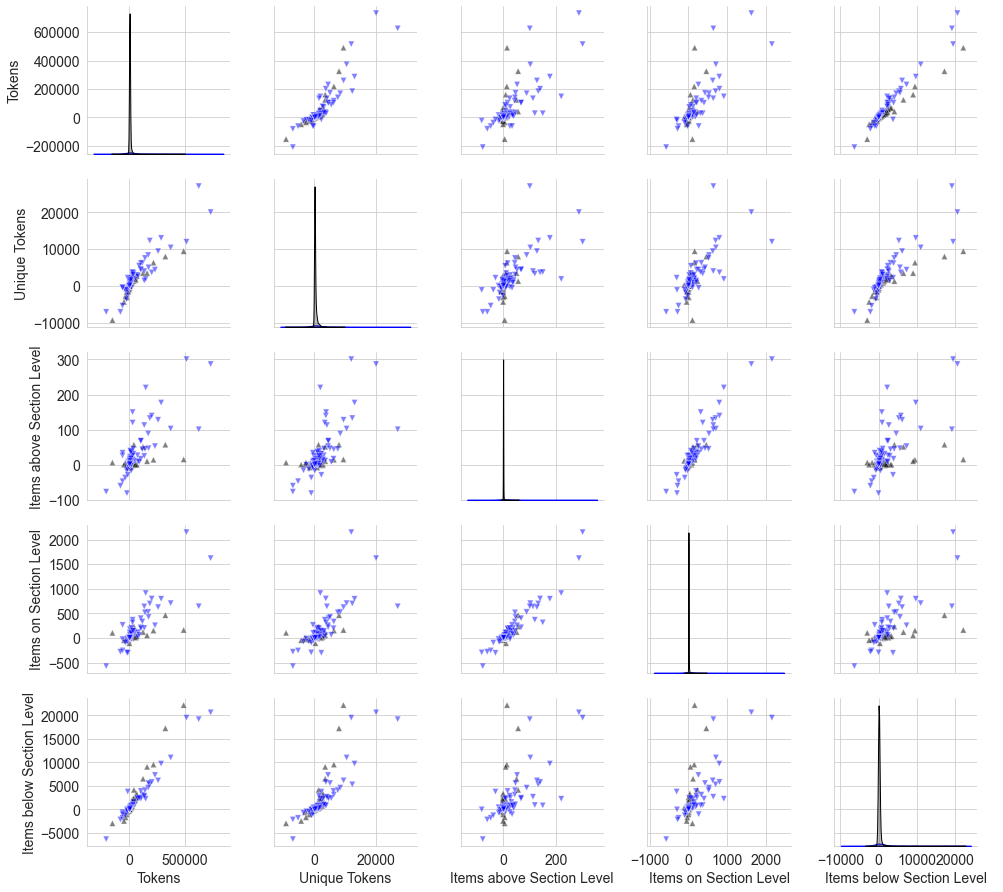

In [18]:
fontsize = 14
with sns.plotting_context(rc={"font.size":fontsize,"axes.titlesize":fontsize,"axes.labelsize":fontsize,"axes.ticksize":fontsize}):
    g = sns.pairplot(data=plot_df[list(plot_df.columns[:5])+[plot_df.columns[-1]]], 
                     kind='scatter', diag_kind='kde', hue='document_type', palette=['k', 'b'], hue_order=['statute','regulation'], 
                     plot_kws=dict(color='k', alpha=0.5, legend=False), diag_kws=dict(color='k', legend=False), markers=['^', 'v'])
    g._legend.set_title('')
plt.tight_layout()
plt.savefig("../graphics/profile-statistics-changes-top-row-us.pdf", transparent=True)

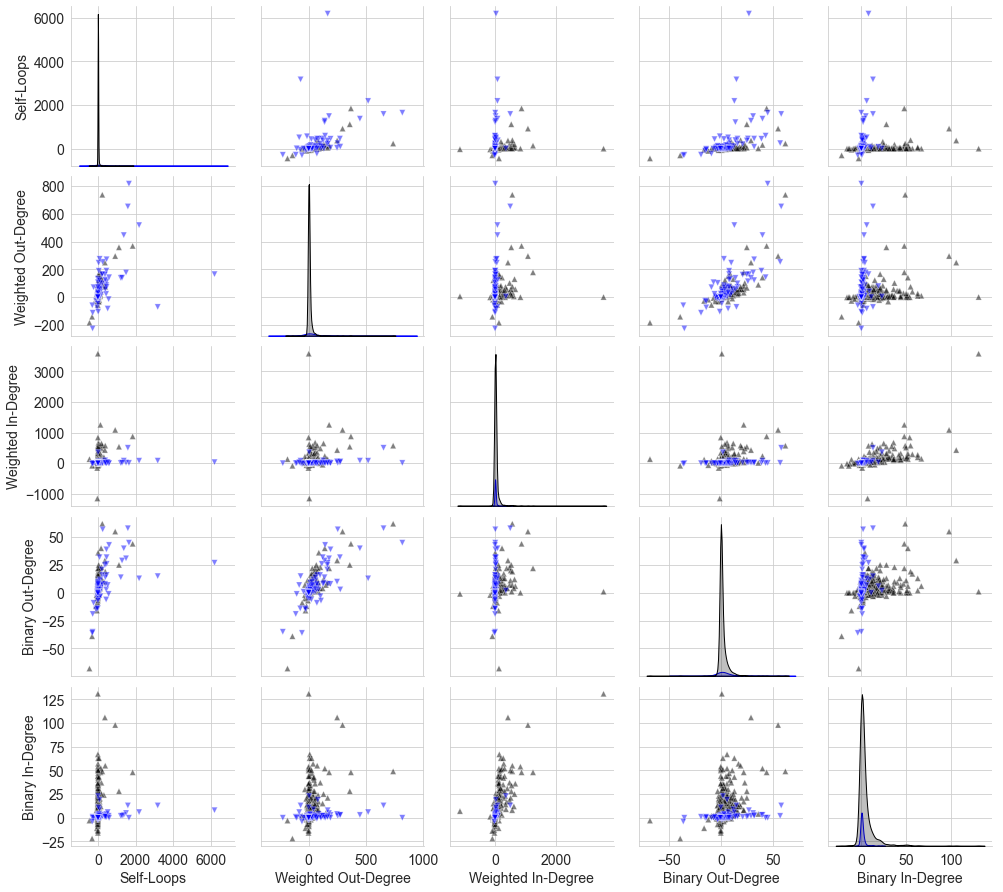

In [19]:
fontsize = 14
with sns.plotting_context(rc={"font.size":fontsize,"axes.titlesize":fontsize,"axes.labelsize":fontsize,"axes.ticksize":fontsize}):
    g = sns.pairplot(data=plot_df[list(plot_df.columns[5:-1])+[plot_df.columns[-1]]], 
                     kind='scatter', diag_kind='kde', hue='document_type', palette=['k', 'b'], hue_order=['statute','regulation'], 
                     plot_kws=dict(color='k', alpha=0.5, legend=False), diag_kws=dict(color='k', legend=False), markers=['^', 'v'])
    g._legend.set_title('')
plt.tight_layout()
plt.savefig("../graphics/profile-statistics-changes-bottom-row-us.pdf", transparent=True)

In [20]:
plot_df.columns

Index(['Tokens', 'Unique Tokens', 'Items above Section Level',
       'Items on Section Level', 'Items below Section Level', 'Self-Loops',
       'Weighted Out-Degree', 'Weighted In-Degree', 'Binary Out-Degree',
       'Binary In-Degree', 'document_type'],
      dtype='object')

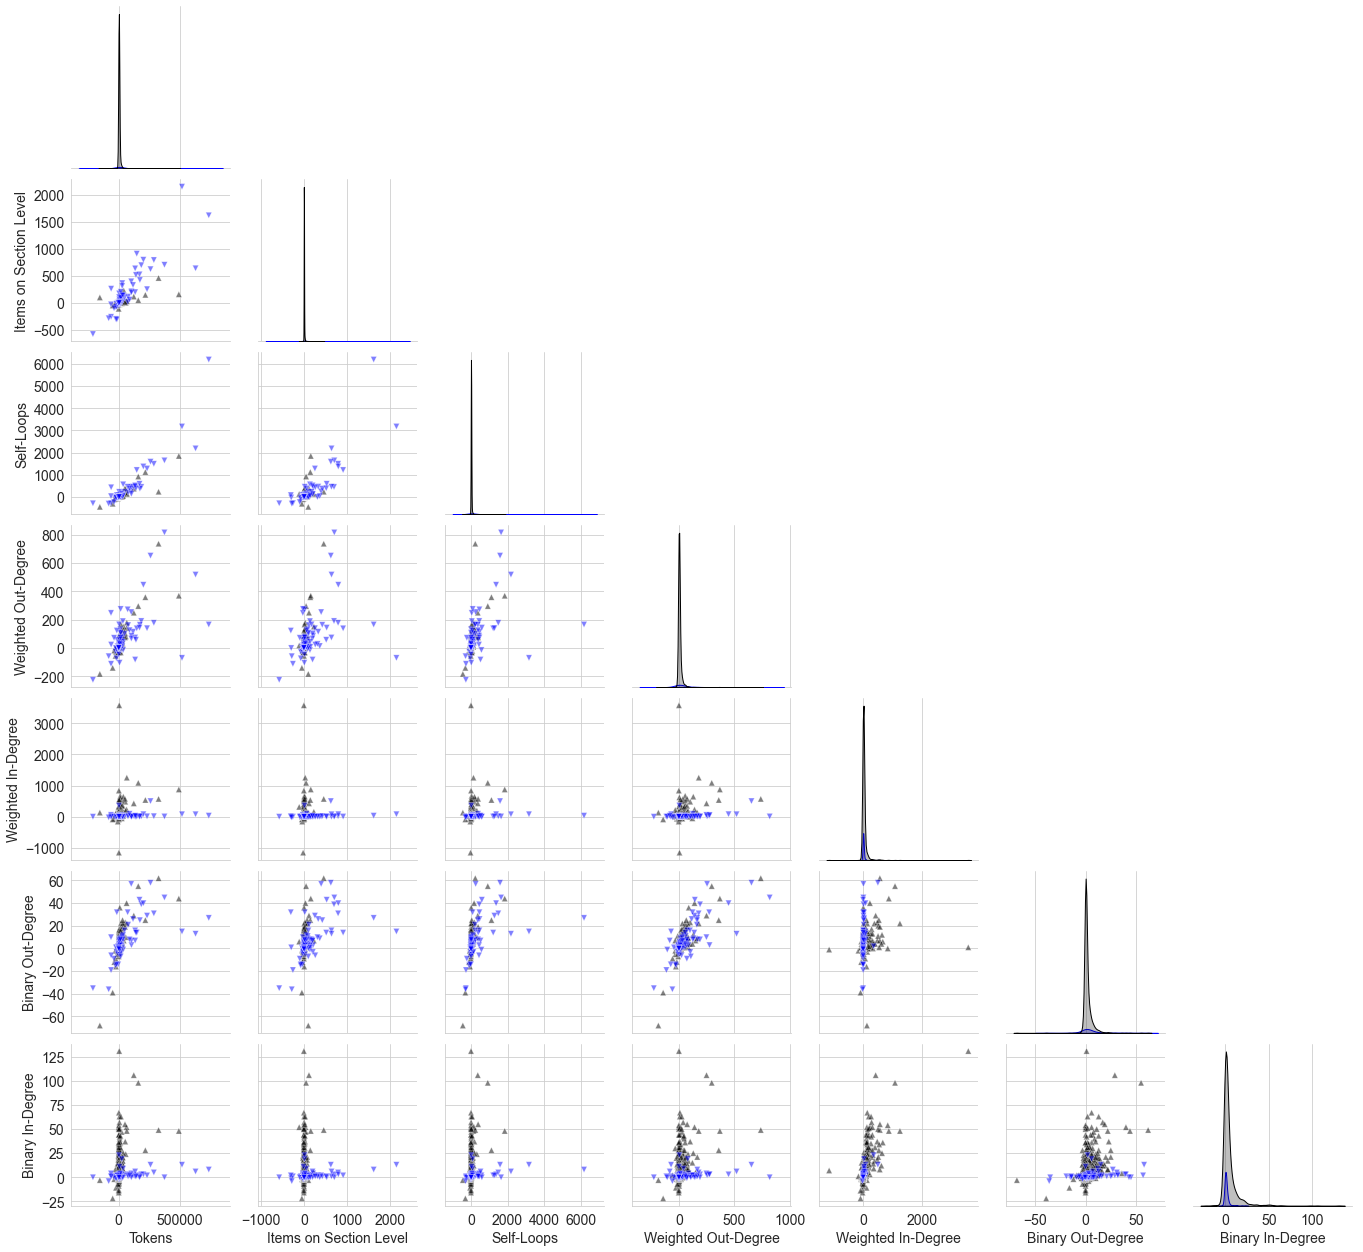

In [21]:
fontsize = 14
columns = ['Tokens', 'Items on Section Level', 'Self-Loops',
       'Weighted Out-Degree', 'Weighted In-Degree', 'Binary Out-Degree',
       'Binary In-Degree', 'document_type']
with sns.plotting_context(rc={"font.size":fontsize,"axes.titlesize":fontsize,"axes.labelsize":fontsize,"axes.ticksize":fontsize}):
    g = sns.pairplot(data=plot_df[columns], 
                     kind='scatter', diag_kind='kde', hue='document_type', palette=['k', 'b'], hue_order=['statute','regulation'], 
                     corner=True, plot_kws=dict(color='k', alpha=0.5, legend=False), diag_kws=dict(color='k', legend=False), markers=['^', 'v'])
    g._legend.set_title('')
plt.tight_layout()
plt.savefig("../graphics/profile-statistics-changes-mixed-us.pdf", transparent=True)